# 안녕하세요^^ 
## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
#%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.2 seoul_moving_month_4.csv

[데이터 소개]
* 서울 시 구별 이동 2022년 4월 데이터

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_4_step1.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_4_step1.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding='UTF-8')

In [3]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 10)

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


* 1번 열의 의미
    * " 2022년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '인구이동(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)

    - 해당 값을 나름의 기준으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리로 인해 '*'로 나오는 곳이 있습니다 확인해볼까요?
seoul_moving.loc[seoul_moving['이동인구(합)'] == '*']

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
25,202204,일,0,11010,11010,F,25,HW,10,*
159,202204,일,0,11010,11010,M,40,HW,20,*
222,202204,일,0,11010,11020,F,20,HE,20,*
224,202204,일,0,11010,11020,F,20,EW,20,*
225,202204,일,0,11010,11020,F,20,WW,10,*
...,...,...,...,...,...,...,...,...,...,...
968425,202204,토,23,39000,11240,M,20,EW,60,*
968426,202204,토,23,39000,11240,M,20,EE,70,*
968439,202204,토,23,39000,11250,F,20,EE,80,*
968441,202204,토,23,39000,11250,F,30,EE,70,*


In [8]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체
seoul_moving=seoul_moving.replace('*',1.5)

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.loc[seoul_moving['이동인구(합)'] == '*']

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)


In [10]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
seoul_moving = seoul_moving.astype({"이동인구(합)":'float'})
seoul_moving['이동인구(합)'].info()

<class 'pandas.core.series.Series'>
Int64Index: 28923054 entries, 0 to 968462
Series name: 이동인구(합)
Non-Null Count     Dtype  
--------------     -----  
28923054 non-null  float64
dtypes: float64(1)
memory usage: 441.3 MB


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['이동유형'].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['요일'].value_counts()

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

* 4월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['성별'].value_counts()

M    16355029
F    12568025
Name: 성별, dtype: int64

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving_night=seoul_moving[(seoul_moving['도착시간']<5)]
seoul_night_by_day = seoul_moving_night.groupby('요일')['이동인구(합)'].sum()
seoul_night_by_day = seoul_night_by_day.sort_values(ascending= False)
print(seoul_night_by_day)

요일
토    5233200.14
금    4206523.57
일    3550710.46
목    3311174.58
수    3203277.45
화    3035154.60
월    2511032.17
Name: 이동인구(합), dtype: float64


-> 토요일이 제일 많습니다

#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다!

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving = seoul_moving.loc[seoul_moving['출발 시군구 코드'].between(11010,11250)]
seoul_moving = seoul_moving.loc[seoul_moving['도착 시군구 코드'].between(11010,11250)]

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['출발 시군구 코드'].unique()

array([11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090,
       11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180,
       11190, 11200, 11210, 11220, 11230, 11240, 11250], dtype=int64)

In [17]:
seoul_moving['도착 시군구 코드'].unique()

array([11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090,
       11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180,
       11190, 11200, 11210, 11220, 11230, 11240, 11250], dtype=int64)

In [18]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는? -> 11230 용산구

* 유입이 제일 많은 구는? -> 11230 용산구

* 유출이 제일 적은 구는? -> 11180 성북구

* 유입이 제일 적은 구는? -> 11180 성북구

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.drop(seoul_moving.loc[(seoul_moving['도착시간']<=4) & (seoul_moving['도착시간']>=0),].index, axis=0, inplace=True)
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
14654,202204,일,5,11110,11080,F,65,EW,10,4.68
14655,202204,일,5,11110,11080,F,65,WH,10,9.44
14656,202204,일,5,11110,11080,F,70,HW,10,5.69
14657,202204,일,5,11110,11080,F,70,HE,10,5.68
14658,202204,일,5,11110,11080,F,70,EH,20,5.73
...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10
920411,202204,토,23,11250,11250,M,80,EH,10,28.36
920412,202204,토,23,11250,11250,M,80,EE,20,37.99
920413,202204,토,23,11250,11250,M,80,HE,10,9.42


In [20]:
seoul_moving['평균 이동 시간 * 이동인구(합)'] = seoul_moving.loc[:,'평균 이동 시간(분)'] * seoul_moving.loc[:,'이동인구(합)']

In [21]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),평균 이동 시간 * 이동인구(합)
14654,202204,일,5,11110,11080,F,65,EW,10,4.68,46.8
14655,202204,일,5,11110,11080,F,65,WH,10,9.44,94.4
14656,202204,일,5,11110,11080,F,70,HW,10,5.69,56.9
14657,202204,일,5,11110,11080,F,70,HE,10,5.68,56.8
14658,202204,일,5,11110,11080,F,70,EH,20,5.73,114.6


#### [실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [22]:
#이동을 출발지 기준으로

def func(x):
    d = {}
    d['이동인구(합)의 총합'] = x['이동인구(합)'].sum()
    d['이동인구(합)의 평균'] = x['이동인구(합)'].mean()
    d['평균 이동 시간(분)의 평균'] = x['평균 이동 시간 * 이동인구(합)'].sum() / d['이동인구(합)의 총합']
    return pd.Series(d, index=['이동인구(합)의 총합','이동인구(합)의 평균','평균 이동 시간(분)의 평균'])

temp_moving = seoul_moving.groupby(by=["도착 시군구 코드"], as_index=False).apply(func)

In [23]:
seoul_moving = pd.merge(seoul_moving, temp_moving, how='inner', on='도착 시군구 코드')

In [24]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),평균 이동 시간 * 이동인구(합),이동인구(합)의 총합,이동인구(합)의 평균,평균 이동 시간(분)의 평균
0,202204,일,5,11110,11080,F,65,EW,10,4.68,46.8,11270988.1,48.931749,15.947557
1,202204,일,5,11110,11080,F,65,WH,10,9.44,94.4,11270988.1,48.931749,15.947557
2,202204,일,5,11110,11080,F,70,HW,10,5.69,56.9,11270988.1,48.931749,15.947557
3,202204,일,5,11110,11080,F,70,HE,10,5.68,56.8,11270988.1,48.931749,15.947557
4,202204,일,5,11110,11080,F,70,EH,20,5.73,114.6,11270988.1,48.931749,15.947557


In [25]:
map_list = {11010 : '종로구', 11020 : '중구', 11030 : '용산구', 11040 : '성동구', 11050:'광진구', 11060:'동대문구', 11070:'중랑구', 11080:'성북구', 11090:'강북구', 11100:'도봉구', 11110:'노원구', 11120:'은평구', 11130:'서대문구', 11140:'마포구', 11150:'양천구', 11160:'강서구', 11170:'구로구', 11180:'금천구', 11190:'영등포구', 11200:'동작구', 11210:'관악구', 11220:'서초구', 11230:'강남구', 11240:'송파구', 11250:'강동구'}

seoul_moving['출발 시군구 코드'] = seoul_moving.loc[:,'출발 시군구 코드'].map(map_list)
seoul_moving['도착 시군구 코드'] = seoul_moving.loc[:,'도착 시군구 코드'].map(map_list)
seoul_moving['나이 * 이동인구(합)'] = seoul_moving['나이'] * seoul_moving['이동인구(합)']

In [26]:
city = ['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']

#전체 인구
def func(x): 
    d = {}
    d['이동인구의 총합'] = x['이동인구(합)'].sum()
    d['이동인구의 평균나이'] = x['나이 * 이동인구(합)'].sum() / d['이동인구의 총합']
    d['전체 평균 이동 시간'] = x['평균 이동 시간 * 이동인구(합)'].sum() / d['이동인구의 총합']
    return pd.Series(d, index=['이동인구의 총합','이동인구의 평균나이','전체 평균 이동 시간'])

#유출 인구
def func2(x):
    d = {}
    d['유출 이동인구'] = x['이동인구(합)'].sum()
    d['유출 이동인구의 평균나이'] = x['나이 * 이동인구(합)'].sum() / d['유출 이동인구']
    d['유출 평균 이동 시간'] = x['평균 이동 시간 * 이동인구(합)'].sum() / d['유출 이동인구']
    return pd.Series(d, index=['유출 이동인구','유출 이동인구의 평균나이','유출 평균 이동 시간'])

#유입 인구
def func3(x):
    d = {}
    d['유입 이동인구'] = x['이동인구(합)'].sum()
    d['유입 이동인구의 평균나이'] = x['나이 * 이동인구(합)'].sum() / d['유입 이동인구']
    d['유입 평균 이동 시간'] = x['평균 이동 시간 * 이동인구(합)'].sum() / d['유입 이동인구']
    return pd.Series(d, index=['유입 이동인구','유입 이동인구의 평균나이','유입 평균 이동 시간'])

a = seoul_moving.groupby(by=["도착 시군구 코드"], as_index=False).apply(func)
a.rename(columns={'도착 시군구 코드':'자치구'}, inplace=True)

#출발 기준 유출
in_out_df = seoul_moving.loc[seoul_moving['출발 시군구 코드'] != seoul_moving['도착 시군구 코드'],]
b = in_out_df.groupby(by=["출발 시군구 코드"], as_index=False).apply(func2)
b.rename(columns={'출발 시군구 코드':'자치구'}, inplace=True)

#도착 기준 유입
c = in_out_df.groupby(by=["도착 시군구 코드"], as_index=False).apply(func3)
c.rename(columns={'도착 시군구 코드':'자치구'}, inplace=True)

a = pd.merge(a,b,how='inner', on='자치구')
a = pd.merge(a,c,how='inner', on='자치구')

a['유입 유출 차이'] = a['유입 이동인구'] - a['유출 이동인구']
a['외부 이동 비율'] = a['유출 이동인구'] / a['이동인구의 총합']

In [27]:
def func(x): 
    d = {}
    d['이동인구의 총합'] = x['이동인구(합)'].sum()
    d['전체 평균 이동 시간'] = x['평균 이동 시간 * 이동인구(합)'].sum() / d['이동인구의 총합']
    return pd.Series(d, index=['이동인구의 총합','전체 평균 이동 시간'])

In [28]:
for i in city:
    temp = seoul_moving.loc[(seoul_moving['출발 시군구 코드']== i) & (seoul_moving['출발 시군구 코드'] != seoul_moving['도착 시군구 코드']),].groupby(by=["나이"], as_index=False).apply(func)
    temp['이동인구의 총합 * 이동 시간'] = temp.loc[:,'이동인구의 총합'] * temp.loc[:,'전체 평균 이동 시간']
    
    a.loc[a['자치구']== i,'영유아 이동인구 합'] = temp.loc[(temp['나이']>=0) & (temp['나이']<=5),['이동인구의 총합']].sum().values
    a.loc[a['자치구']== i,'영유아 이동인구 평균 이동 시간'] = temp.loc[(temp['나이']>=0) & (temp['나이']<=5),['이동인구의 총합 * 이동 시간']].sum().values / a.loc[a['자치구']== i,'영유아 이동인구 합']
    
    a.loc[a['자치구']== i,'아동 이동인구 합'] = temp.loc[(temp['나이']>=6) & (temp['나이']<=15),['이동인구의 총합']].sum().values
    a.loc[a['자치구']== i,'아동 이동인구 평균 이동 시간'] = temp.loc[(temp['나이']>=6) & (temp['나이']<=15),['이동인구의 총합 * 이동 시간']].sum().values / a.loc[a['자치구']== i,'아동 이동인구 합']
    
    a.loc[a['자치구']== i,'청소년 이동인구 합'] = temp.loc[(temp['나이']>=16) & (temp['나이']<=20),['이동인구의 총합']].sum().values
    a.loc[a['자치구']== i,'청소년 이동인구 평균 이동 시간'] = temp.loc[(temp['나이']>=16) & (temp['나이']<=20),['이동인구의 총합 * 이동 시간']].sum().values / a.loc[a['자치구']== i,'청소년 이동인구 합']
    
    a.loc[a['자치구']== i,'청년 이동인구 합'] = temp.loc[(temp['나이']>=21) & (temp['나이']<=30),['이동인구의 총합']].sum().values
    a.loc[a['자치구']== i,'청년 이동인구 평균 이동 시간'] = temp.loc[(temp['나이']>=21) & (temp['나이']<=30),['이동인구의 총합 * 이동 시간']].sum().values / a.loc[a['자치구']== i,'청년 이동인구 합']
    
    a.loc[a['자치구']== i,'중년 이동인구 합'] = temp.loc[(temp['나이']>=31) & (temp['나이']<=50),['이동인구의 총합']].sum().values
    a.loc[a['자치구']== i,'중년 이동인구 평균 이동 시간'] = temp.loc[(temp['나이']>=31) & (temp['나이']<=50),['이동인구의 총합 * 이동 시간']].sum().values / a.loc[a['자치구']== i,'중년 이동인구 합']
    
    a.loc[a['자치구']== i,'장년 이동인구 합'] = temp.loc[(temp['나이']>=51) & (temp['나이']<=65),['이동인구의 총합']].sum().values
    a.loc[a['자치구']== i,'장년 이동인구 평균 이동 시간'] = temp.loc[(temp['나이']>=51) & (temp['나이']<=65),['이동인구의 총합 * 이동 시간']].sum().values / a.loc[a['자치구']== i,'장년 이동인구 합']
    
    a.loc[a['자치구']== i,'노년 이동인구 합'] = temp.loc[temp['나이']>=66,['이동인구의 총합']].sum().values
    a.loc[a['자치구']== i,'노년 이동인구 평균 이동 시간'] = temp.loc[temp['나이']>=66,['이동인구의 총합 * 이동 시간']].sum().values / a.loc[a['자치구']== i,'노년 이동인구 합']

In [29]:
a.head()

,자치구,이동인구의 총합,이동인구의 평균나이,전체 평균 이동 시간,유출 이동인구,유출 이동인구의 평균나이,유출 평균 이동 시간,유입 이동인구,유입 이동인구의 평균나이,유입 평균 이동 시간,...,청소년 이동인구 합,청소년 이동인구 평균 이동 시간,청년 이동인구 합,청년 이동인구 평균 이동 시간,중년 이동인구 합,중년 이동인구 평균 이동 시간,장년 이동인구 합,장년 이동인구 평균 이동 시간,노년 이동인구 합,노년 이동인구 평균 이동 시간
0,강남구,29182496.02,39.507600,15.971030,14096031.92,41.566129,22.225979,12924768.10,41.008286,21.539631,...,857489.65,26.889273,3181518.83,27.448269,5109568.15,22.084069,2764481.46,21.232289,1233701.45,14.222305
1,강동구,14395702.78,42.815083,15.425798,4418092.51,44.881727,22.267379,4331073.13,44.931778,22.824051,...,194680.78,28.783691,684802.11,28.787128,1496812.54,23.154939,1144185.20,21.771700,534910.86,14.935095
2,강북구,7727739.40,45.509509,15.970223,3670588.03,45.307652,19.800233,3801782.61,45.540605,20.249509,...,209017.22,24.860371,474849.49,27.228982,1099396.22,21.392977,966830.02,19.514375,541775.01,13.011052
3,강서구,14008312.51,41.874588,15.918304,4910643.22,42.742058,22.476153,4945462.16,43.108735,22.703103,...,239100.67,28.569292,990510.72,28.623625,1695515.40,22.904308,1112330.61,21.371265,486132.32,14.429807
4,관악구,11630903.18,41.426746,16.713624,5397388.49,41.600805,21.285124,5651909.33,42.236745,21.491680,...,437614.01,26.208656,1327016.97,26.203198,1574910.16,21.159115,1127583.38,19.564263,561539.59,13.558420


In [30]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   자치구                25 non-null     object 
 1   이동인구의 총합           25 non-null     float64
 2   이동인구의 평균나이         25 non-null     float64
 3   전체 평균 이동 시간        25 non-null     float64
 4   유출 이동인구            25 non-null     float64
 5   유출 이동인구의 평균나이      25 non-null     float64
 6   유출 평균 이동 시간        25 non-null     float64
 7   유입 이동인구            25 non-null     float64
 8   유입 이동인구의 평균나이      25 non-null     float64
 9   유입 평균 이동 시간        25 non-null     float64
 10  유입 유출 차이           25 non-null     float64
 11  외부 이동 비율           25 non-null     float64
 12  영유아 이동인구 합         25 non-null     float64
 13  영유아 이동인구 평균 이동 시간  25 non-null     float64
 14  아동 이동인구 합          25 non-null     float64
 15  아동 이동인구 평균 이동 시간   25 non-null     float64
 16  청소년 이동인구 합         25 non-nu

In [31]:
data = {'자치구':["합계"],
        '이동인구의 총합':[a.loc[:,'이동인구의 총합'].sum()],
        '이동인구의 평균나이':[(a.loc[:,'이동인구의 총합'] * a.loc[:,'이동인구의 평균나이']).sum()/a.loc[:,'이동인구의 총합'].sum()],
        '전체 평균 이동 시간':[(a.loc[:,'이동인구의 총합'] * a.loc[:,'전체 평균 이동 시간']).sum()/a.loc[:,'이동인구의 총합'].sum()],
        
        '유출 이동인구':[a.loc[:,'유출 이동인구'].sum()],
        '유출 이동인구의 평균나이':[(a.loc[:,'유출 이동인구'] * a.loc[:,'유출 이동인구의 평균나이']).sum()/a.loc[:,'유출 이동인구'].sum()],
        '유출 평균 이동 시간':[(a.loc[:,'유출 이동인구'] * a.loc[:,'유출 평균 이동 시간']).sum()/a.loc[:,'유출 이동인구'].sum()],
        
        '유입 이동인구':[a.loc[:,'유입 이동인구'].sum()],
        '유입 이동인구의 평균나이':[(a.loc[:,'유입 이동인구'] * a.loc[:,'유입 이동인구의 평균나이']).sum()/a.loc[:,'유입 이동인구'].sum()],
        '유입 평균 이동 시간':[(a.loc[:,'유입 이동인구'] * a.loc[:,'유입 평균 이동 시간']).sum()/a.loc[:,'유입 이동인구'].sum()],

        '유입 유출 차이':[a.loc[:,'유입 유출 차이'].sum()],
        '외부 이동 비율':[a.loc[:,'외부 이동 비율'].mean()],
        
        '영유아 이동인구 합':[a.loc[:,'영유아 이동인구 합'].sum()],
        '영유아 이동인구 평균 이동 시간':[(a.loc[:,'영유아 이동인구 합'] * a.loc[:,'영유아 이동인구 평균 이동 시간']).sum()/a.loc[:,'영유아 이동인구 합'].sum()],
        
        '아동 이동인구 합':[a.loc[:,'아동 이동인구 합'].sum()],
        '아동 이동인구 평균 이동 시간':[(a.loc[:,'아동 이동인구 합'] * a.loc[:,'아동 이동인구 평균 이동 시간']).sum()/a.loc[:,'아동 이동인구 합'].sum()],
        
        '청소년 이동인구 합':[a.loc[:,'청소년 이동인구 합'].sum()],
        '청소년 이동인구 평균 이동 시간':[(a.loc[:,'청소년 이동인구 합'] * a.loc[:,'청소년 이동인구 평균 이동 시간']).sum()/a.loc[:,'청소년 이동인구 합'].sum()],
        
        '청년 이동인구 합':[a.loc[:,'청년 이동인구 합'].sum()],
        '청년 이동인구 평균 이동 시간':[(a.loc[:,'청년 이동인구 합'] * a.loc[:,'청년 이동인구 평균 이동 시간']).sum()/a.loc[:,'청년 이동인구 합'].sum()],
        
        '중년 이동인구 합':[a.loc[:,'중년 이동인구 합'].sum()],
        '중년 이동인구 평균 이동 시간':[(a.loc[:,'중년 이동인구 합'] * a.loc[:,'중년 이동인구 평균 이동 시간']).sum()/a.loc[:,'중년 이동인구 합'].sum()],
        
        '장년 이동인구 합':[a.loc[:,'장년 이동인구 합'].sum()],
        '장년 이동인구 평균 이동 시간':[(a.loc[:,'장년 이동인구 합'] * a.loc[:,'장년 이동인구 평균 이동 시간']).sum()/a.loc[:,'장년 이동인구 합'].sum()],
        
        '노년 이동인구 합':[a.loc[:,'노년 이동인구 합'].sum()],
        '노년 이동인구 평균 이동 시간':[(a.loc[:,'노년 이동인구 합'] * a.loc[:,'노년 이동인구 평균 이동 시간']).sum()/a.loc[:,'노년 이동인구 합'].sum()]
        }

data = pd.DataFrame(data)

a = pd.concat([data,a])
a.reset_index(drop=True, inplace=True)

In [54]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
seoul_moving.to_csv("df_seoul_moving.csv", index = False)
a.to_csv("df_seoul_moving_custom.csv", index=False)

In [55]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489135 entries, 0 to 5489134
Data columns (total 18 columns):
 #   Column              Dtype   
---  ------              -----   
 0   대상연월                int64   
 1   요일                  object  
 2   도착시간                int64   
 3   출발 시군구 코드           object  
 4   도착 시군구 코드           object  
 5   성별                  object  
 6   나이                  int64   
 7   이동유형                object  
 8   평균 이동 시간(분)         int64   
 9   이동인구(합)             float64 
 10  평균 이동 시간 * 이동인구(합)  float64 
 11  이동인구(합)의 총합         float64 
 12  이동인구(합)의 평균         float64 
 13  평균 이동 시간(분)의 평균     float64 
 14  나이 * 이동인구(합)        float64 
 15  age_group           category
 16  move_type           object  
 17  이동인구(만명)            float64 
dtypes: category(1), float64(7), int64(4), object(6)
memory usage: 759.1+ MB


In [56]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),평균 이동 시간 * 이동인구(합),이동인구(합)의 총합,이동인구(합)의 평균,평균 이동 시간(분)의 평균,나이 * 이동인구(합),age_group,move_type,이동인구(만명)
0,202204,일,5,노원구,성북구,F,65,EW,10,4.68,46.8,11270988.1,48.931749,15.947557,304.2,60s,E->W,0.000468
1,202204,일,5,노원구,성북구,F,65,WH,10,9.44,94.4,11270988.1,48.931749,15.947557,613.6,60s,W->H,0.000944
2,202204,일,5,노원구,성북구,F,70,HW,10,5.69,56.9,11270988.1,48.931749,15.947557,398.3,70s,H->W,0.000569
3,202204,일,5,노원구,성북구,F,70,HE,10,5.68,56.8,11270988.1,48.931749,15.947557,397.6,70s,H->E,0.000568
4,202204,일,5,노원구,성북구,F,70,EH,20,5.73,114.6,11270988.1,48.931749,15.947557,401.1,70s,E->H,0.000573


In [57]:
seoul_moving.corr()

C:\Users\wldud\AppData\Local\Temp\ipykernel_4452\1183674964.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seoul_moving.corr()


,대상연월,도착시간,나이,평균 이동 시간(분),이동인구(합),평균 이동 시간 * 이동인구(합),이동인구(합)의 총합,이동인구(합)의 평균,평균 이동 시간(분)의 평균,나이 * 이동인구(합),이동인구(만명)
대상연월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
도착시간,NaN,1.000000,-0.066007,0.069923,-0.003895,0.013437,-0.014719,-0.008475,-0.018549,-0.020592,-0.003895
나이,NaN,-0.066007,1.000000,-0.147052,-0.020832,-0.045788,-0.005999,-0.004905,0.002734,0.136902,-0.020832
평균 이동 시간(분),NaN,0.069923,-0.147052,1.000000,-0.152786,-0.075766,0.015091,0.036262,-0.047118,-0.159471,-0.152786
이동인구(합),NaN,-0.003895,-0.020832,-0.152786,1.000000,0.926378,0.091454,0.094538,-0.027779,0.854628,1.000000
평균 이동 시간 * 이동인구(합),NaN,0.013437,-0.045788,-0.075766,0.926378,1.000000,0.112402,0.114676,-0.025459,0.781352,0.926378
이동인구(합)의 총합,NaN,-0.014719,-0.005999,0.015091,0.091454,0.112402,1.000000,0.967378,-0.137482,0.082414,0.091454
이동인구(합)의 평균,NaN,-0.008475,-0.004905,0.036262,0.094538,0.114676,0.967378,1.000000,-0.293834,0.086770,0.094538
평균 이동 시간(분)의 평균,NaN,-0.018549,0.002734,-0.047118,-0.027779,-0.025459,-0.137482,-0.293834,1.000000,-0.027715,-0.027779
나이 * 이동인구(합),NaN,-0.020592,0.136902,-0.159471,0.854628,0.781352,0.082414,0.086770,-0.027715,1.000000,0.854628


In [58]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   자치구                26 non-null     object 
 1   이동인구의 총합           26 non-null     float64
 2   이동인구의 평균나이         26 non-null     float64
 3   전체 평균 이동 시간        26 non-null     float64
 4   유출 이동인구            26 non-null     float64
 5   유출 이동인구의 평균나이      26 non-null     float64
 6   유출 평균 이동 시간        26 non-null     float64
 7   유입 이동인구            26 non-null     float64
 8   유입 이동인구의 평균나이      26 non-null     float64
 9   유입 평균 이동 시간        26 non-null     float64
 10  유입 유출 차이           26 non-null     float64
 11  외부 이동 비율           26 non-null     float64
 12  영유아 이동인구 합         26 non-null     float64
 13  영유아 이동인구 평균 이동 시간  26 non-null     float64
 14  아동 이동인구 합          26 non-null     float64
 15  아동 이동인구 평균 이동 시간   26 non-null     float64
 16  청소년 이동인구 합         26 non-nu

In [59]:
a.head()

,자치구,이동인구의 총합,이동인구의 평균나이,전체 평균 이동 시간,유출 이동인구,유출 이동인구의 평균나이,유출 평균 이동 시간,유입 이동인구,유입 이동인구의 평균나이,유입 평균 이동 시간,...,청소년 이동인구 합,청소년 이동인구 평균 이동 시간,청년 이동인구 합,청년 이동인구 평균 이동 시간,중년 이동인구 합,중년 이동인구 평균 이동 시간,장년 이동인구 합,장년 이동인구 평균 이동 시간,노년 이동인구 합,노년 이동인구 평균 이동 시간
0,합계,3.051644e+08,41.751577,16.031169,1.431141e+08,42.794616,20.972350,1.431141e+08,42.794616,20.972350,...,9299110.44,25.236100,27163293.99,26.366463,48076465.70,21.418618,31859274.67,20.242202,15266782.93,13.728527
1,강남구,2.918250e+07,39.507600,15.971030,1.409603e+07,41.566129,22.225979,1.292477e+07,41.008286,21.539631,...,857489.65,26.889273,3181518.83,27.448269,5109568.15,22.084069,2764481.46,21.232289,1233701.45,14.222305
2,강동구,1.439570e+07,42.815083,15.425798,4.418093e+06,44.881727,22.267379,4.331073e+06,44.931778,22.824051,...,194680.78,28.783691,684802.11,28.787128,1496812.54,23.154939,1144185.20,21.771700,534910.86,14.935095
3,강북구,7.727739e+06,45.509509,15.970223,3.670588e+06,45.307652,19.800233,3.801783e+06,45.540605,20.249509,...,209017.22,24.860371,474849.49,27.228982,1099396.22,21.392977,966830.02,19.514375,541775.01,13.011052
4,강서구,1.400831e+07,41.874588,15.918304,4.910643e+06,42.742058,22.476153,4.945462e+06,43.108735,22.703103,...,239100.67,28.569292,990510.72,28.623625,1695515.40,22.904308,1112330.61,21.371265,486132.32,14.429807


In [60]:
a.corr()

C:\Users\wldud\AppData\Local\Temp\ipykernel_4452\2489384948.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.corr()


,이동인구의 총합,이동인구의 평균나이,전체 평균 이동 시간,유출 이동인구,유출 이동인구의 평균나이,유출 평균 이동 시간,유입 이동인구,유입 이동인구의 평균나이,유입 평균 이동 시간,유입 유출 차이,...,청소년 이동인구 합,청소년 이동인구 평균 이동 시간,청년 이동인구 합,청년 이동인구 평균 이동 시간,중년 이동인구 합,중년 이동인구 평균 이동 시간,장년 이동인구 합,장년 이동인구 평균 이동 시간,노년 이동인구 합,노년 이동인구 평균 이동 시간
이동인구의 총합,1.000000,-0.084216,-0.020873,0.999237,-0.062944,0.067701,0.999097,-0.076278,0.031840,-0.068447,...,0.997462,0.000325,0.998294,0.015901,0.999000,0.035078,0.999266,0.057027,0.998489,0.020218
이동인구의 평균나이,-0.084216,1.000000,-0.044965,-0.086281,0.941141,-0.081709,-0.083872,0.949820,0.007042,0.188392,...,-0.108108,0.177577,-0.108026,0.345839,-0.090711,0.273963,-0.067846,0.097094,-0.057771,0.127308
전체 평균 이동 시간,-0.020873,-0.044965,1.000000,0.001267,-0.209473,0.022928,0.004967,-0.232827,-0.124895,0.281616,...,0.012123,-0.382975,0.014701,-0.369340,0.003233,-0.264994,-0.005914,-0.032457,-0.001641,0.090518
유출 이동인구,0.999237,-0.086281,0.001267,1.000000,-0.068318,0.044007,0.999914,-0.083381,0.000628,-0.064387,...,0.998754,-0.030340,0.999352,-0.014186,0.999855,0.005393,0.999731,0.034385,0.999244,0.002303
유출 이동인구의 평균나이,-0.062944,0.941141,-0.209473,-0.068318,1.000000,-0.062741,-0.067121,0.984292,0.025859,0.095056,...,-0.093168,0.235681,-0.093551,0.424214,-0.072195,0.371684,-0.049154,0.179879,-0.037999,0.138758
유출 평균 이동 시간,0.067701,-0.081709,0.022928,0.044007,-0.062741,1.000000,0.039514,-0.084404,0.937059,-0.344596,...,0.024868,0.770511,0.056804,0.737655,0.051118,0.836079,0.040685,0.881459,0.029431,0.846853
유입 이동인구,0.999097,-0.083872,0.004967,0.999914,-0.067121,0.039514,1.000000,-0.081637,-0.002184,-0.051302,...,0.998913,-0.034585,0.999099,-0.017532,0.999638,0.002094,0.999743,0.031195,0.999398,-0.000517
유입 이동인구의 평균나이,-0.076278,0.949820,-0.232827,-0.083381,0.984292,-0.084404,-0.081637,1.000000,0.035083,0.137613,...,-0.104964,0.233002,-0.109536,0.414645,-0.089154,0.358801,-0.063113,0.128946,-0.051907,0.108953
유입 평균 이동 시간,0.031840,0.007042,-0.124895,0.000628,0.025859,0.937059,-0.002184,0.035083,1.000000,-0.214066,...,-0.015249,0.810978,0.006132,0.802361,0.003555,0.886714,0.001946,0.850175,-0.007829,0.759178
유입 유출 차이,-0.068447,0.188392,0.281616,-0.064387,0.095056,-0.344596,-0.051302,0.137613,-0.214066,1.000000,...,-0.045693,-0.321418,-0.077055,-0.253888,-0.074391,-0.251441,-0.056924,-0.244832,-0.046102,-0.214838


---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [39]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid') 

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

## 1. 이동의 연령 분석

C:\Users\wldud\AppData\Local\Temp\ipykernel_4452\731837519.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = seoul_moving.groupby(['age_group']).mean()['평균 이동 시간(분)']


age_group
10s    18.029666
20s    29.525418
30s    26.488045
40s    23.149641
50s    24.198217
60s    22.013611
70s    16.822664
Name: 평균 이동 시간(분), dtype: float64
일곱 그룹의 평균 이동 시간의 평균: 22.88960877955659


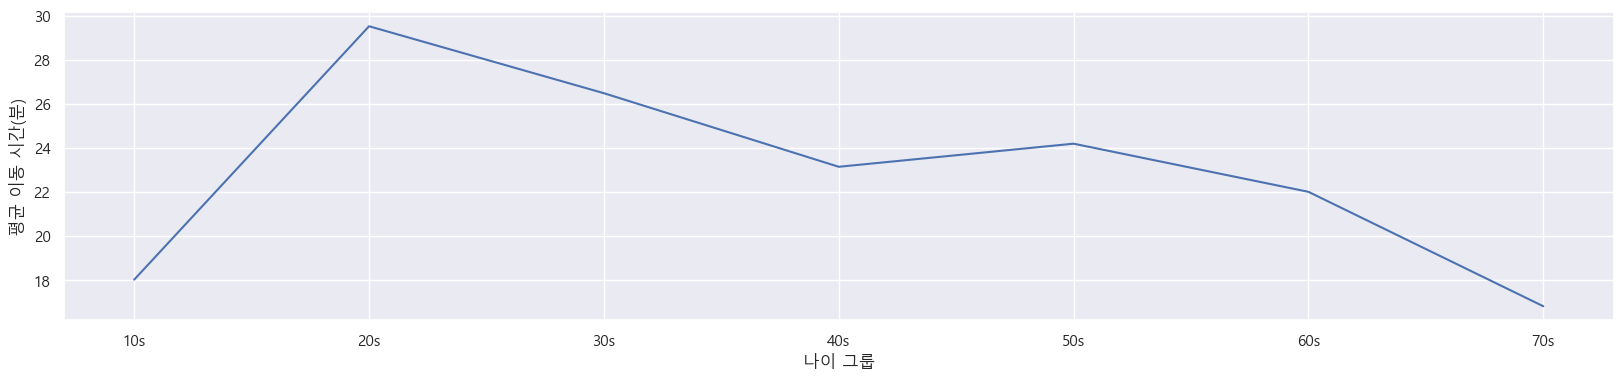

In [40]:
# 1. (나이, 평균 이동시간) 연령과 이동시간 분석? 
# 20대->30대->50대->40대->60대->10대->70대 잘 놀러다니는 20대

# 나이를 10, 15, 20을 한 묶음, 20, 25, 30을 한 묶음, 30, 35, 40----을 한 묶음으로 나눔
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s']
seoul_moving['age_group'] = pd.cut(seoul_moving['나이'], bins=bins, labels=labels, right=False)

# 각 그룹별 평균 이동시간 계산
grouped = seoul_moving.groupby(['age_group']).mean()['평균 이동 시간(분)']

# 일곱 그룹의 평균 이동시간의 평균 계산
average_time = grouped.mean()

# 결과 출력
print(grouped)
print("일곱 그룹의 평균 이동 시간의 평균:", average_time)

plt.figure(figsize=(20,4))
plt.plot(grouped.index, grouped.values)
plt.xlabel('나이 그룹')
plt.ylabel('평균 이동 시간(분)')
plt.show()

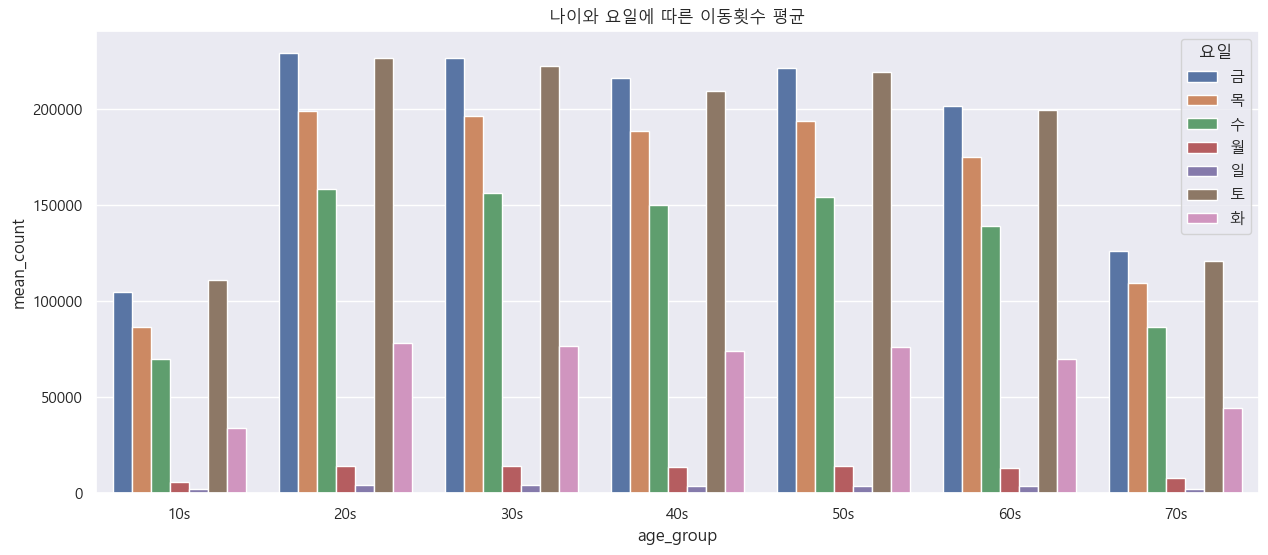

In [41]:
# 3. (나이, 요일) 연령과 요일 분석? 
# 10대가 가장 요일에 관계없이 이동횟수 비슷한 편이고 나머지 연령은 거의 높낮이가 비슷한 형태

# 요일을 기준으로 데이터 그룹핑
grouped = seoul_moving.groupby(['age_group', '요일']).size().reset_index(name='count')

# 그룹핑된 데이터에서 각각의 평균 계산
grouped_mean = grouped.groupby(['age_group', '요일'])['count'].mean().reset_index(name='mean_count')

# 결과 출력
plt.figure(figsize=(15, 6))
sns.barplot(x='age_group', y='mean_count', hue='요일', data=grouped_mean)
plt.title('나이와 요일에 따른 이동횟수 평균')
plt.show()

C:\Users\wldud\AppData\Local\Temp\ipykernel_4452\287142672.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = seoul_moving.groupby(['age_group']).sum()['이동인구(합)']


age_group
10s    25491596.87
20s    45103437.10
30s    47019671.58
40s    47395015.53
50s    47803589.75
60s    43719966.97
70s    23392479.69
Name: 이동인구(합), dtype: float64


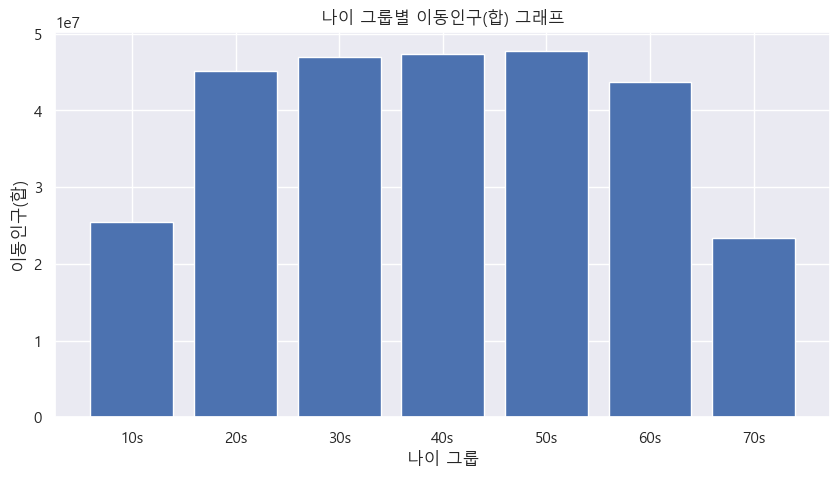

In [42]:
# 4. (나이, 이동인구) 연령에 따른 이동인구 분석 
# 50대-> 40대->30대->20대->60대->10대->70대 은근히 20대가 적어요 아무래도 직장 다니니까?

# 각 그룹별 이동인구(합) 계산
grouped = seoul_moving.groupby(['age_group']).sum()['이동인구(합)']

# 결과 출력
print(grouped)

# 그래프 출력
plt.figure(figsize=(10,5))
plt.bar(grouped.index, grouped.values)
plt.title('나이 그룹별 이동인구(합) 그래프')
plt.xlabel('나이 그룹')
plt.ylabel('이동인구(합)')
plt.show()

- H(야간상주지), W(주간상주지), E(기타)
- HW : 출근, 등교
- WH : 퇴근, 하교

## 2. 이동유형 분석

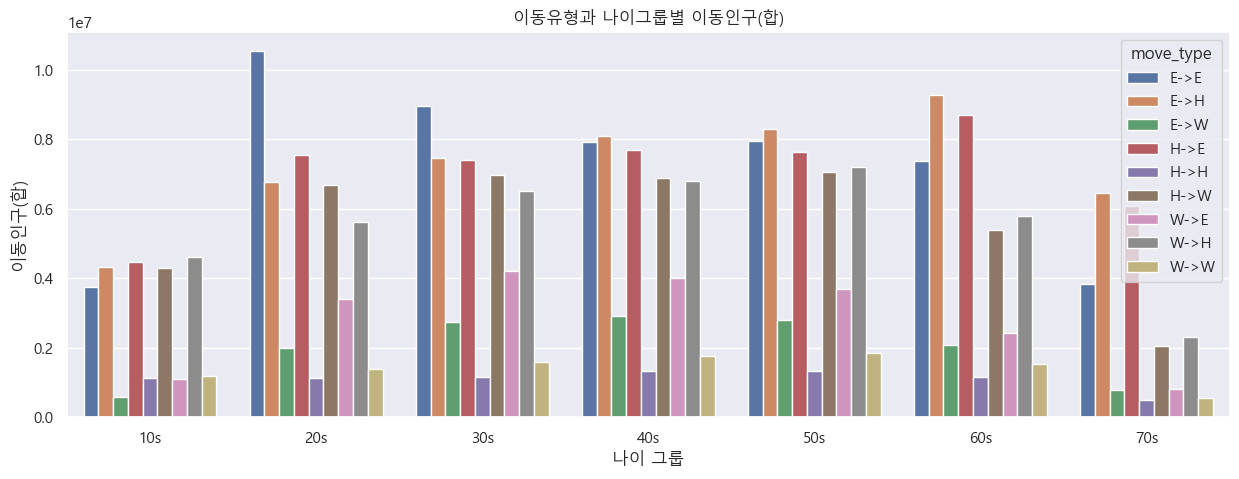

In [43]:
#이동유형과 나이그룹별 이동인구(합)

# 이동인구(합) 기준 이동유형 묶음
type_dict = {'EH': 'E->H', 'HE': 'H->E', 'EE': 'E->E', 'WH': 'W->H', 'HW': 'H->W', 'WE': 'W->E', 'EW': 'E->W', 'WW': 'W->W', 'HH': 'H->H'}
seoul_moving['move_type'] = seoul_moving['이동유형'].map(type_dict)

# 이동유형과 나이그룹별 이동인구(합) 계산
move_age = seoul_moving.groupby(['move_type', 'age_group'])['이동인구(합)'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(15, 5))
sns.barplot(x='age_group', y='이동인구(합)', hue='move_type', data=move_age)
plt.title('이동유형과 나이그룹별 이동인구(합)')
plt.xlabel('나이 그룹')
plt.ylabel('이동인구(합)')
plt.show()

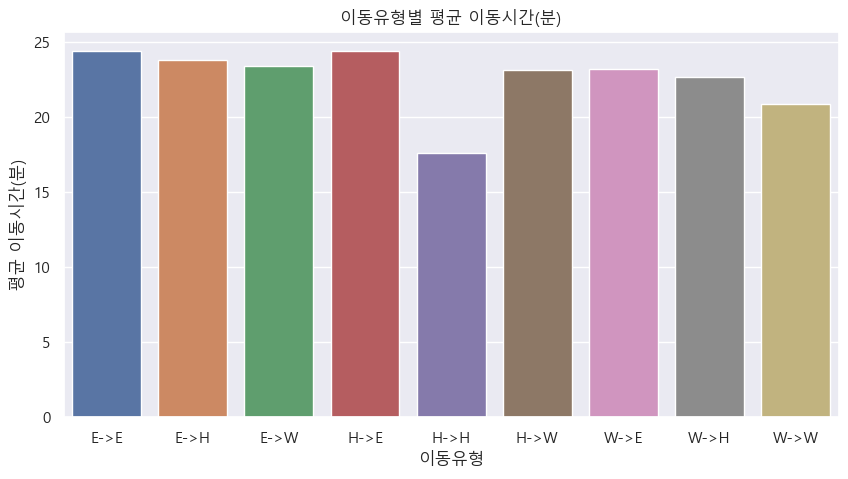

In [44]:
#1. (이동유형, 평균 이동시간) 이동유형에 따른 이동시간 분석? -> 버스로 이동인지 판단?

# 이동유형별 평균 이동시간 계산
move_type_avg = seoul_moving.groupby('move_type')['평균 이동 시간(분)'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 5))
sns.barplot(x=move_type_avg.index, y=move_type_avg.values)
plt.title('이동유형별 평균 이동시간(분)')
plt.xlabel('이동유형')
plt.ylabel('평균 이동시간(분)')
plt.show()

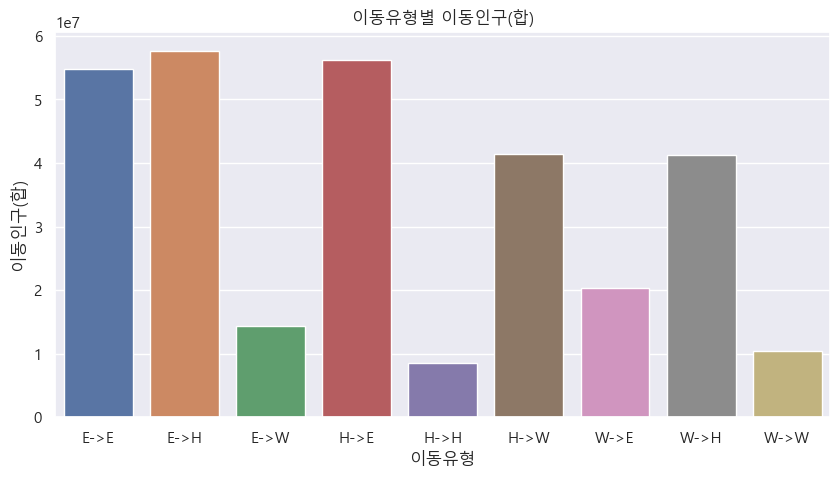

In [45]:
#2. (이동유형, 이동인구) 이동유형에 따른 이동인구 분석?
# 퇴근하는 사람보다 출근하는 사람이 더 많음.

# 이동유형별 이동인구(합) 계산
move_type_pop = seoul_moving.groupby('move_type')['이동인구(합)'].sum()

# 그래프 그리기
plt.figure(figsize=(10, 5))
sns.barplot(x=move_type_pop.index, y=move_type_pop.values)
plt.title('이동유형별 이동인구(합)')
plt.xlabel('이동유형')
plt.ylabel('이동인구(합)')
plt.show()

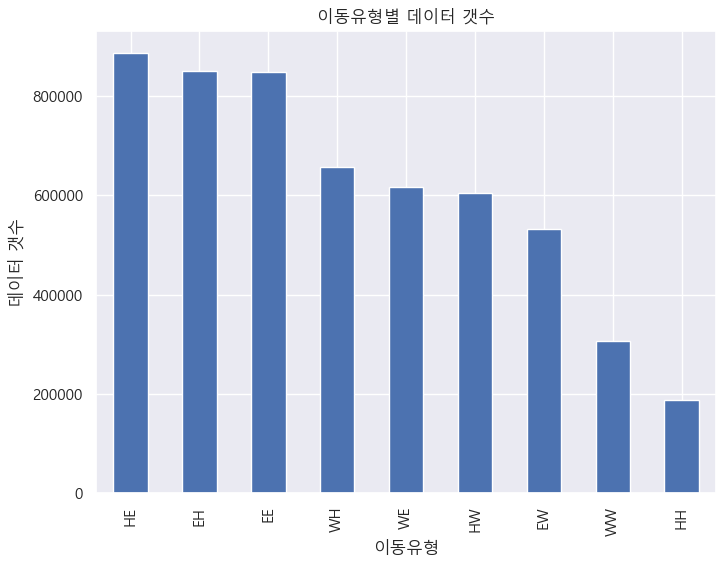

In [46]:
plt.figure(figsize=(8,6))
seoul_moving['이동유형'].value_counts().plot(kind='bar')
plt.title('이동유형별 데이터 갯수')
plt.xlabel('이동유형')
plt.ylabel('데이터 갯수')
plt.show()

## 3. 요일 분석

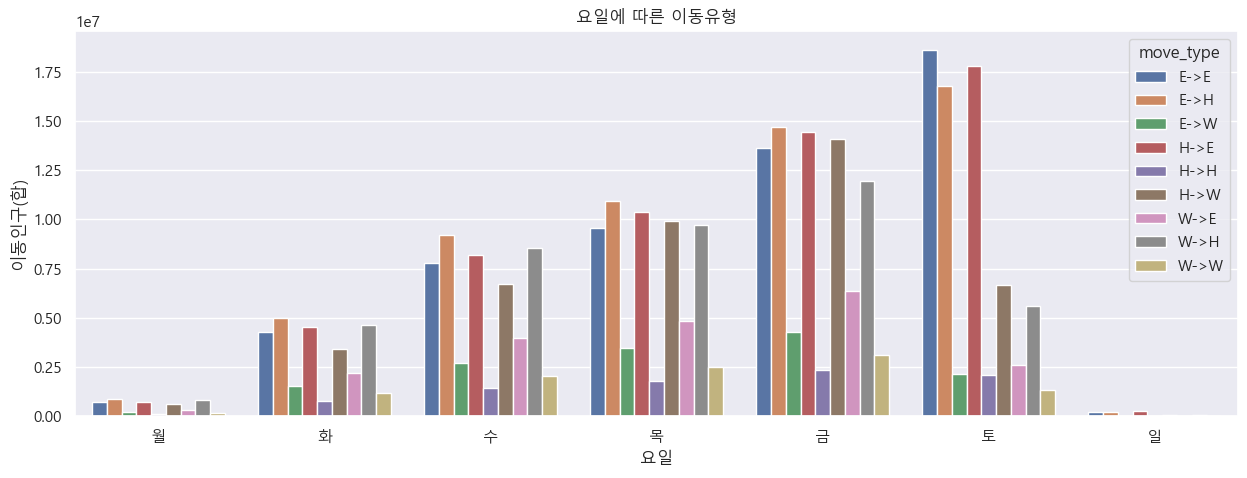

In [47]:
# 1. (요일, 이동유형) 요일에 따른 이동유형 분석?
# 토요일에 유독 EE가 많네 주말에는 HW가 줄고, WH 줄고(출퇴근 안해서), HE 늘어

# 월~일 순서대로 요일 지정
weekday_order = ['월', '화', '수', '목', '금', '토', '일']

# 요일에 따른 이동인구(합) 계산
day_type_sum = seoul_moving.groupby(['요일', 'move_type'])['이동인구(합)'].sum()

# 그래프 그리기
plt.figure(figsize=(15, 5))
sns.barplot(x=day_type_sum.reset_index()['요일'], y=day_type_sum.values, hue=day_type_sum.reset_index()['move_type'], order=weekday_order)
plt.title('요일에 따른 이동유형')
plt.xlabel('요일')
plt.ylabel('이동인구(합)')
plt.show()

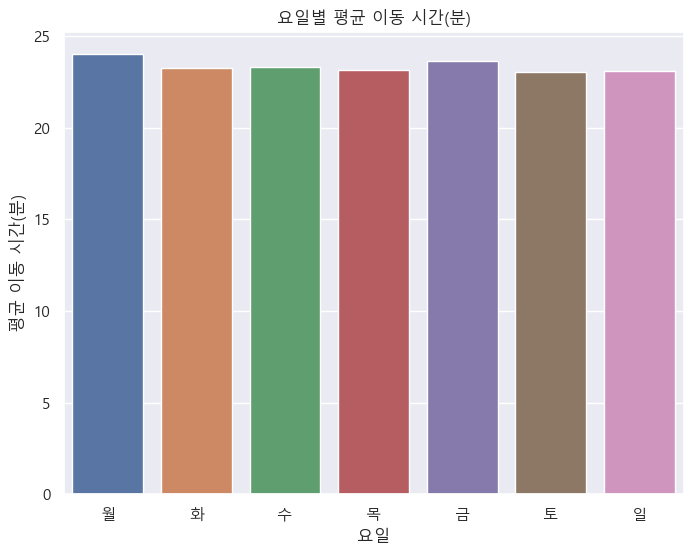

In [48]:
# 요일에 따른 평균 이동시간 분석
# 금요일에 확실히 잘 놀러다님

day_type_avg = seoul_moving.groupby('요일')['평균 이동 시간(분)'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='요일', y='평균 이동 시간(분)', data=day_type_avg, order=weekday_order)
plt.title('요일별 평균 이동 시간(분)')
plt.xlabel('요일')
plt.ylabel('평균 이동 시간(분)')
plt.show()

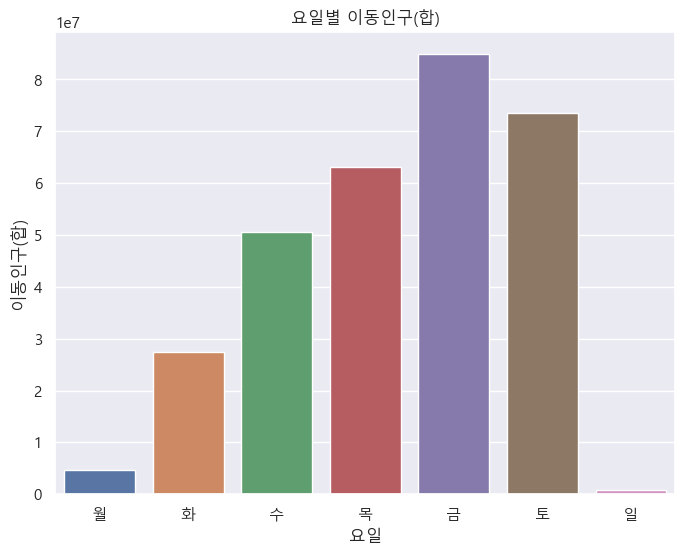

In [49]:
# 3. (요일, 이동인구) 요일별 이동인구 분석?
# 확실히 금요일, 토요일에 잘 놀러다님

# 요일별 이동인구(합) 계산
day_type_sum = seoul_moving.groupby('요일')['이동인구(합)'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='요일', y='이동인구(합)', data=day_type_sum, order=weekday_order)
plt.title('요일별 이동인구(합)')
plt.xlabel('요일')
plt.ylabel('이동인구(합)')
plt.show()

## 4. 자치구별 분석

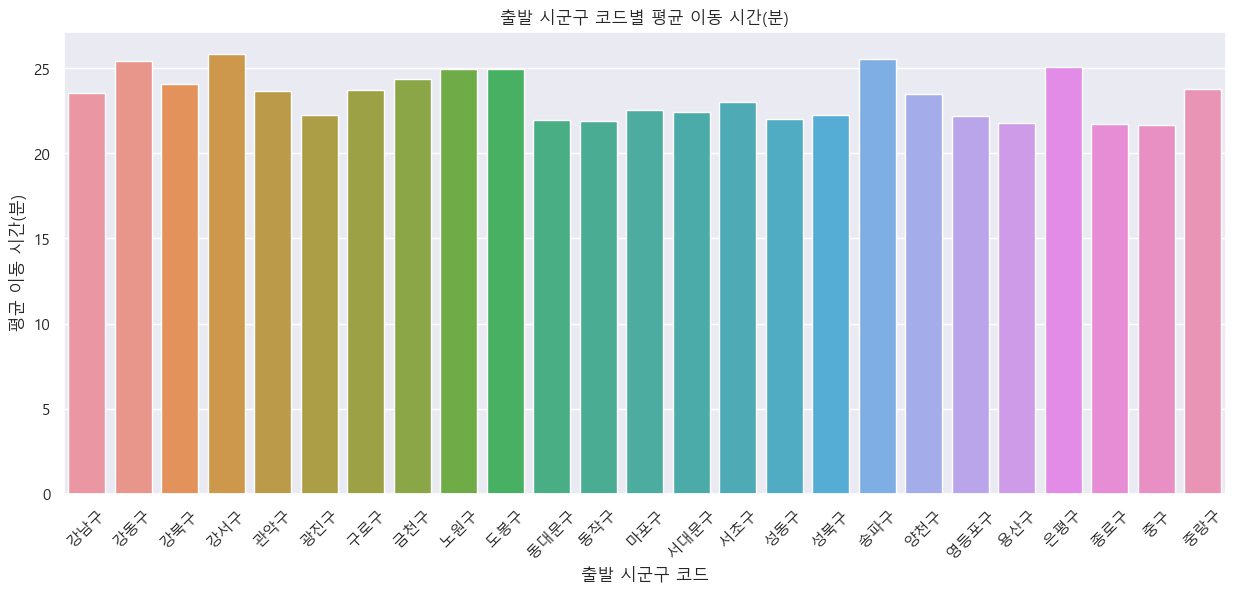

In [50]:
# 1. (출발 시군구 코드, 평균 이동시간) 자치구별 이동시간 분석?
# 11160 동대문구가 제일 이동시간 많아요 왜일까요~~?

# 출발 시군구 코드와 평균 이동 시간(분)을 나타내는 데이터프레임 생성
df1 = seoul_moving[['출발 시군구 코드', '평균 이동 시간(분)']]

# 출발 시군구 코드별 평균 이동 시간(분) 계산
grouped_df = df1.groupby(['출발 시군구 코드']).mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(15,6))
sns.barplot(x='출발 시군구 코드', y='평균 이동 시간(분)', data=grouped_df)
plt.xticks(rotation=45)
plt.title('출발 시군구 코드별 평균 이동 시간(분)')
plt.xlabel('출발 시군구 코드')
plt.ylabel('평균 이동 시간(분)')
plt.show()

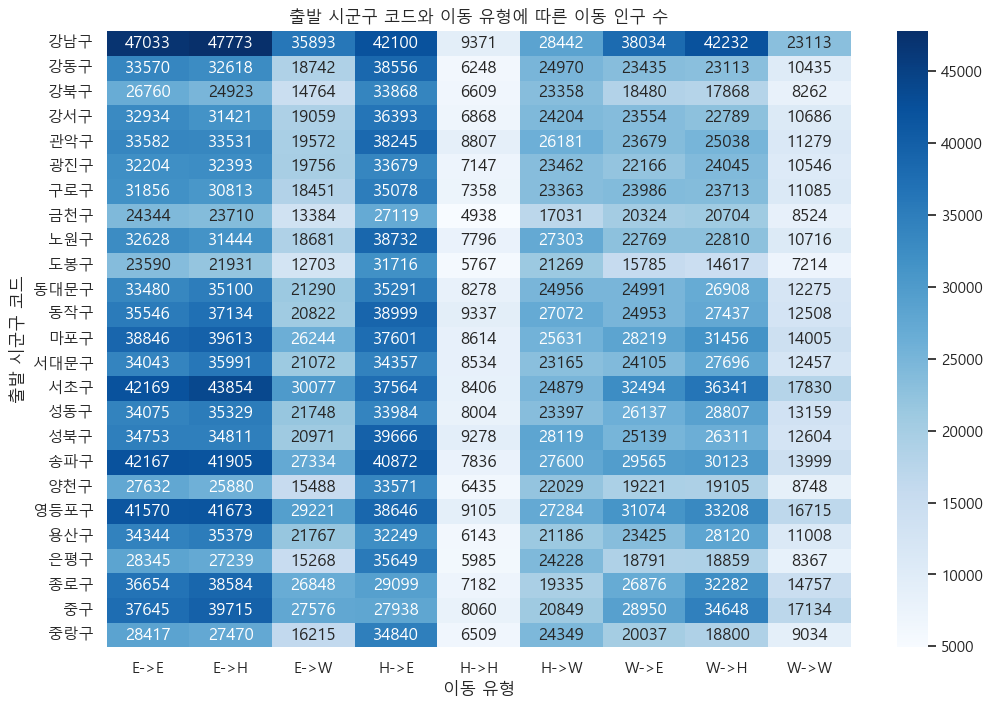

In [51]:
# 2. (출발 시군구 코드, 이동유형) 자치구별 이동유형 분석?
# 11230 EH 많음,11010 EH 많음

# 출발 시군구 코드와 이동유형을 기준으로 그룹화하고 개수(count) 계산
grouped = seoul_moving.groupby(['출발 시군구 코드', 'move_type']).size().reset_index(name='-')

# pivot table을 이용하여 출발 시군구 코드를 index로, move_type을 columns로 변경
pivot_table = grouped.pivot(index='출발 시군구 코드', columns='move_type', values='-').fillna(0)

# heatmap 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='.0f')
plt.title('출발 시군구 코드와 이동 유형에 따른 이동 인구 수')
plt.xlabel('이동 유형')
plt.ylabel('출발 시군구 코드')
plt.show()


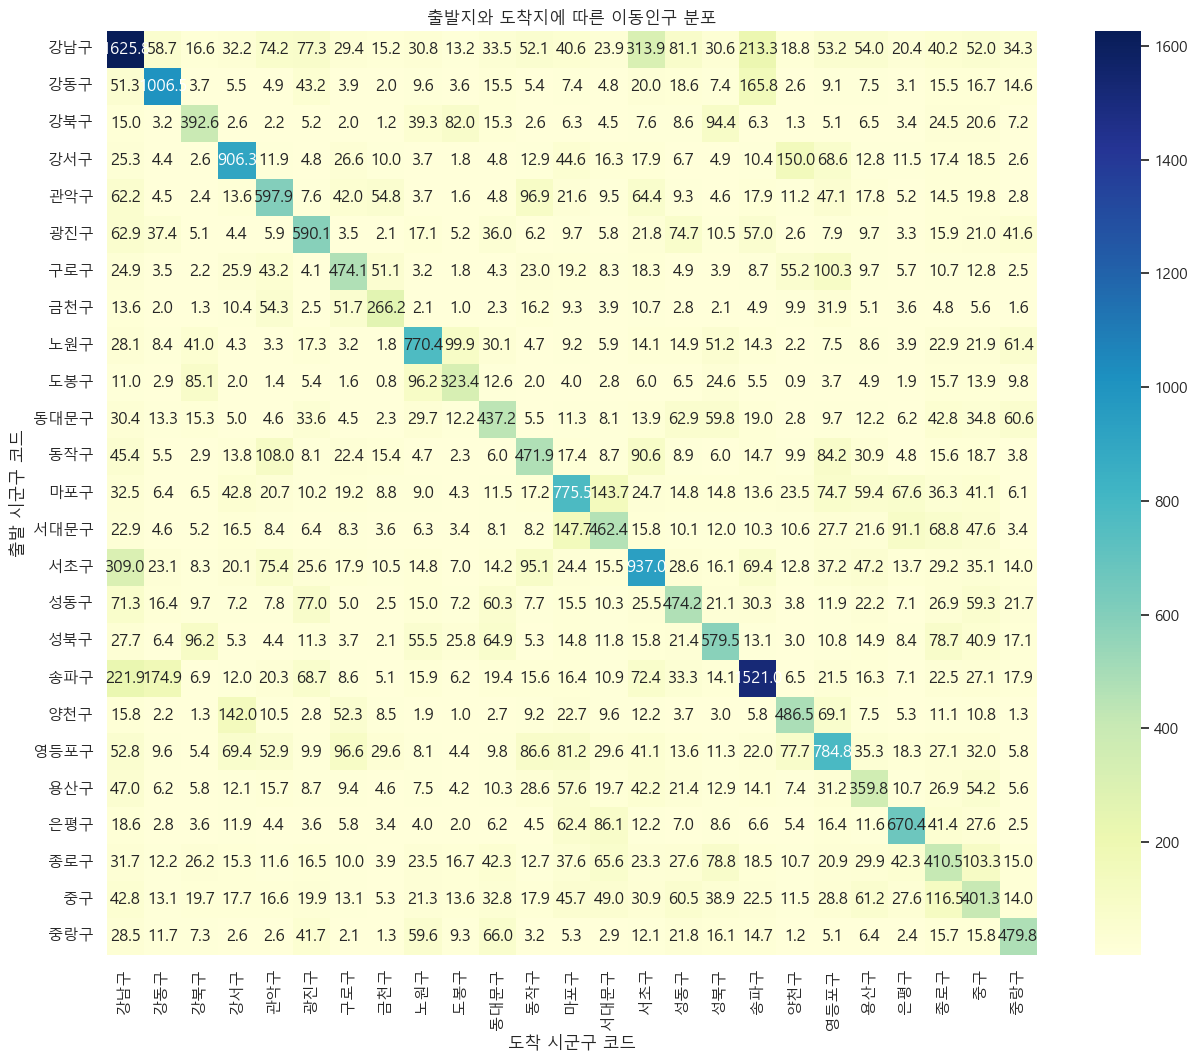

In [52]:
# 3. (출발 시군구 코드, 도착 시군구 코드, 이동인구) 어디서 어디로 이동을 많이 하는지
# 대부분 같은 구 이동을 많이 함.

#이동인구(합)을 10000으로 나누기
seoul_moving['이동인구(만명)'] = seoul_moving['이동인구(합)'] / 10000

# 출발지와 도착지를 기준으로 그룹화하고 이동인구 합을 계산
move_count = seoul_moving.groupby(['출발 시군구 코드', '도착 시군구 코드'])['이동인구(만명)'].sum().reset_index()

# 출발 시군구와 도착 시군구를 각각의 축으로 하는 pivot table 생성
pivot_table = move_count.pivot(index='출발 시군구 코드', columns='도착 시군구 코드', values='이동인구(만명)')

# heatmap으로 그래프 그리기
plt.figure(figsize=(15,12))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('출발지와 도착지에 따른 이동인구 분포')
plt.xlabel('도착 시군구 코드')
plt.ylabel('출발 시군구 코드')
plt.show()

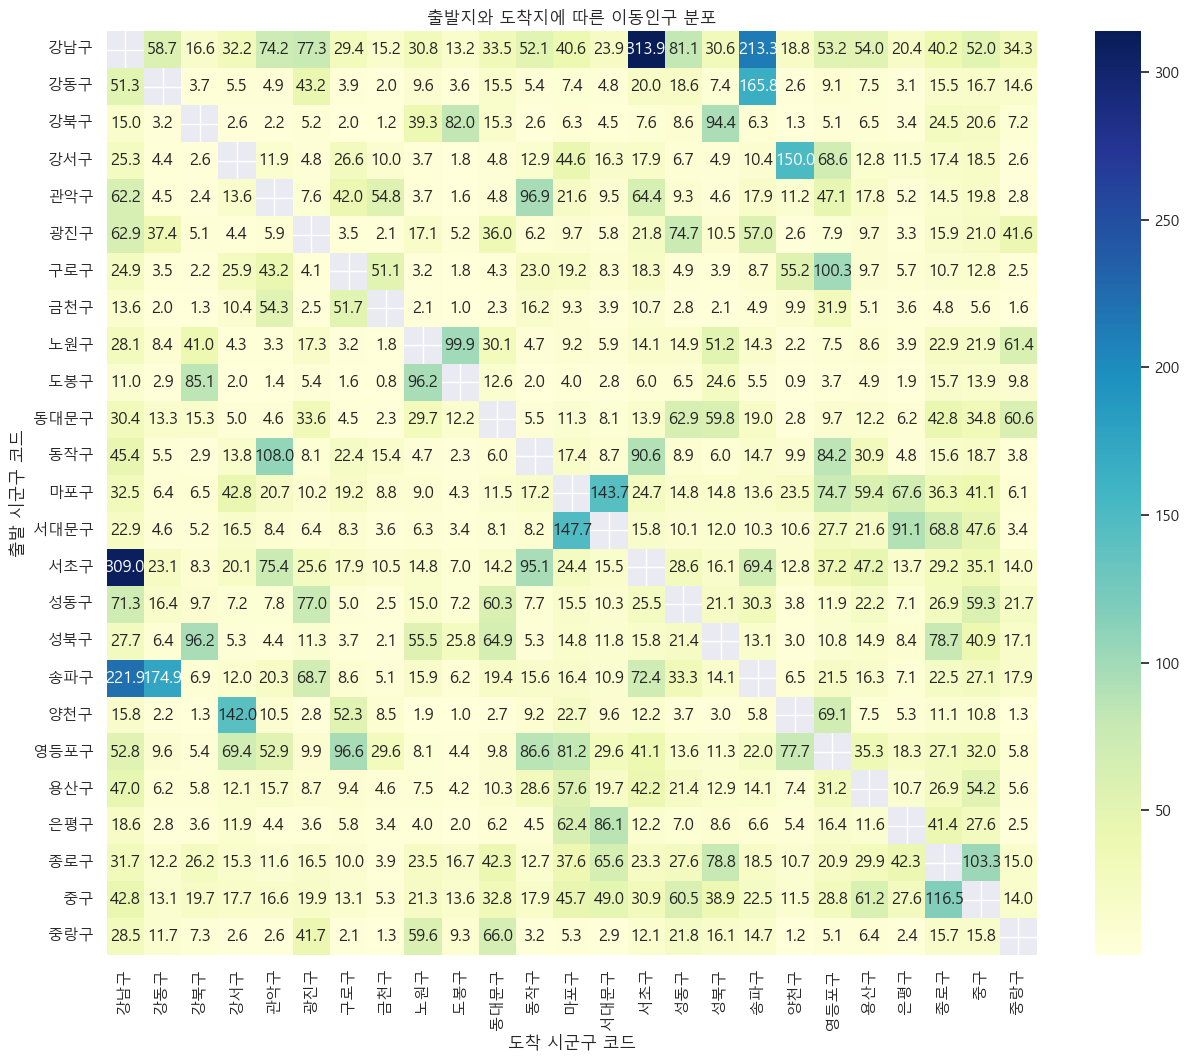

In [53]:
# 3. (출발 시군구 코드, 도착 시군구 코드, 이동인구) 어디서 어디로 이동을 많이 하는지?
# 같은 구 이동을 많이 하므로, 다른 구를 자세히 볼 수 없어서 제외시킨 후 히트맵

#이동인구(합)을 10000으로 나누기
seoul_moving['이동인구(만명)'] = seoul_moving['이동인구(합)'] / 10000

# 출발지와 도착지를 기준으로 그룹화하고 이동인구 합을 계산
move_count = seoul_moving.groupby(['출발 시군구 코드', '도착 시군구 코드'])['이동인구(만명)'].sum().reset_index()

# 출발 시군구 코드와 도착 시군구 코드가 동일하지 않은 데이터만 선택
move_count2 = move_count[move_count['출발 시군구 코드'] != move_count['도착 시군구 코드']]

# 출발 시군구와 도착 시군구를 각각의 축으로 하는 pivot table 생성
pivot_table = move_count2.pivot(index='출발 시군구 코드', columns='도착 시군구 코드', values='이동인구(만명)')

# heatmap으로 그래프 그리기
plt.figure(figsize=(15,12))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('출발지와 도착지에 따른 이동인구 분포')
plt.xlabel('도착 시군구 코드')
plt.ylabel('출발 시군구 코드')
plt.show()

## 1. 이동의 연령 분석?
* 1. (나이, 평균 이동시간) 연령과 이동시간 분석?
* 2. (나이, 이동유형) 연령에 따른 이동유형?
* 3. (나이, 요일) 연령과 요일 분석?
* 4. (나이, 이동인구) 연령에 따른 이동인구 분석
## 2. 이동유형 분석?
* 1. (이동유형, 평균 이동시간) 이동유형에 따른 이동시간 분석? -> 버스로 이동인지 판단?
* 2. (이동유형, 이동인구) 이동유형에 따른 이동인구 분석?
## 3. 요일 분석?
* 1. (요일, 이동유형) 요일에 따른 이동유형 분석?
* 2. (요일, 평균 이동시간) 요일에 따른 평균 이동시간 분석?
* 3. (요일, 이동인구) 요일별 이동인구 분석?
## 4. 자치구별 분석
* 1. (출발 시군구 코드, 평균 이동시간) 자치구별 이동시간 분석?
* 2. (출발 시군구 코드, 이동유형) 자치구별 이동유형 분석?
* 3. (출발 시군구 코드, 도착 시군구 코드, 이동인구) 어디서 어디로 이동을 많이 하는지?

## 위 차트를 통해 알게된 사실을 정리해봅시다.
- 30대부터 이동시간이 줄어든다.
- 근거리 이동?
- 체력이나 피로의 영향?
- 자차의 보유?
- 20대는 외부에서의 활동이 많다.
- 나이가 들며 점점 외부에서의 활동을 이어 나가지 않고 주상지로 복귀한다.
- 이동인구는 65세부터 줄어든다.
- 연령별 인구수와 연관?
- 야간주상지->야간주상지의 평균 이동시간이 가장 짧다.
- 산책?
- 월요알에서 목요일은 집 -> 직장, 금요일에서 일요일은 다양한 활동을 한다.
- 일요일의 이동인구가 적고, 30대 이상의 토요일 이동 비율이 적고, 20대 이하의 금요일 이동 비율이 높다. 
- 서울 외곽지역의 평균 이동 시간이 길다.


---